# Prosper Loan Data Exploration

# Introduction 

The Prosper loan dataset is a comprehensive and diverse collection of information related to loans facilitated by Prosper, a peer-to-peer lending platform. It contains detailed records of 113,937 individual loans, each with 81 variables or attributes associated with it. The dataset covers a wide range of aspects, providing valuable insights into the lending process, borrower characteristics, and loan performance.

Key features of the Prosper loan dataset:

   - Loan Information: The dataset includes essential details about each loan, such as the loan amount, term (duration of the loan), borrower rate (interest rate), and the loan's current status.


   - Borrower Characteristics: It provides valuable information about the borrowers, including their credit grades, credit scores, income range, employment status, and whether they own a home.


   - Loan Performance Metrics: The dataset contains metrics related to loan performance, delinquencies, and public records, allowing analysis of the loans' repayment history.


   - Prosper Ratings and Scores: Prosper uses its proprietary rating system to assess borrower creditworthiness. The dataset includes both numeric and alpha ratings, as well as ProsperScores, which help in understanding the risk associated with borrowers.


   - Geographical Information: For some loans, geographical data like the borrower's state is available, allowing regional analysis.


   - Loan Origination Date and Quarter: Information about the loan origination date and the corresponding quarter is provided, which enables time-based analysis.

# Data Wrangling 

### Gathering Data

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read data 
loan = pd.read_csv('prosperLoanData.csv')

### Assessing Data

#### Visual Assessment

In [3]:
loan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


##### Quality: Visual Assessment
- Remove unnecessary variable

##### Tidiness 
- Split ListingCreationDate into two columns

- Split LoanOriginationQuarter into two columns

#### Programmatic Assessments

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
loan.sample(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
14660,56603555119239110CEA21E,621160,2012-08-06 09:54:39.680000000,NaN,60,Current,NaN,0.30697,0.2804,0.2704,...,-208.27,0.00,0.0,0.0,0.0,1.0,0,0,0.0,12
108357,F4BE36032829105438457B1,1163266,2014-02-19 05:26:29.120000000,NaN,60,Current,NaN,0.21858,0.1940,0.1840,...,0.00,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
45821,AF87357908495477747E8AC,788843,2013-05-26 09:00:03.007000000,NaN,60,Current,NaN,0.25359,0.2284,0.2184,...,-14.46,0.00,0.0,0.0,0.0,1.0,0,0,0.0,32
35459,7133342426912198759257C,353461,2008-06-19 11:37:42.627000000,D,36,Completed,2010-03-22 00:00:00,0.24771,0.2250,0.2150,...,-27.29,0.00,0.0,0.0,0.0,1.0,0,0,0.0,82
42922,16A534970434997747F1807,479207,2010-10-12 05:26:52.367000000,NaN,36,Completed,2012-07-24 00:00:00,0.38058,0.3435,0.3335,...,-105.48,0.00,0.0,0.0,0.0,1.0,0,0,0.0,190
4268,05D73550159087568BB3CAB,596969,2012-06-06 14:12:13.223000000,NaN,36,Completed,2012-08-28 00:00:00,0.35797,0.3177,0.3077,...,-6.16,0.00,0.0,0.0,0.0,1.0,0,0,0.0,3
68807,666A33721891433487629B6,51866,2006-10-23 06:57:15.953000000,HR,36,Completed,2009-09-30 00:00:00,0.16802,0.1500,0.1450,...,-7.40,-11.78,0.0,0.0,0.0,1.0,0,0,0.0,6


##### Quality: Programmatic Assessment
- Remove unnecessary variable

- Replace some columns type

##### Tidiness 
- Split ListingCreationDate into two columns

- Split LoanOriginationQuarter into two columns

### Cleaning Data

In [6]:
# Copy data frame
loan_clean = loan.copy()

#### Tidiness

**Split ListingCreationDate into two columns**

##### Define
*Extract Date & time from ListingCreationDate using `str.extract method`. Then Drop ListingCreationDate column*

##### Code

In [7]:
# Extract Date from timestamp column 
loan_clean['Creation Date'] = loan_clean['ListingCreationDate'].str.extract(r'(\d{4}-\d{2}-\d{2})')
# Extract Time from timestamp column 
loan_clean['Creation Time'] = loan_clean['ListingCreationDate'].str.extract(r'(\d{2}:\d{2}:\d{2})')

# Drop timestamp column
loan_clean.drop(columns=['ListingCreationDate'], inplace=True)

##### Test

In [8]:
loan_clean.head()

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Creation Date,Creation Time
0,1021339766868145413AB3B,193129,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,...,0.0,0.0,0.0,1.0,0,0,0.0,258,2007-08-26,19:09:29
1,10273602499503308B223C1,1209647,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,...,0.0,0.0,0.0,1.0,0,0,0.0,1,2014-02-27,08:28:07
2,0EE9337825851032864889A,81716,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,...,0.0,0.0,0.0,1.0,0,0,0.0,41,2007-01-05,15:00:47
3,0EF5356002482715299901A,658116,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,...,0.0,0.0,0.0,1.0,0,0,0.0,158,2012-10-22,11:02:35
4,0F023589499656230C5E3E2,909464,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,...,0.0,0.0,0.0,1.0,0,0,0.0,20,2013-09-14,18:38:39


**Split LoanOriginationQuarter into two columns**

##### Define
*Split the quarter to anouther column. As well with Date. Then Drop LoanOriginationQuarter*

##### Code

In [9]:
loan_clean['Quarter of Loan'] = loan_clean['LoanOriginationQuarter'].apply(lambda x: x.split()[0])
loan_clean['Year of Loan'] = loan_clean['LoanOriginationQuarter'].apply(lambda x: x.split()[1])

# Drop LoanOriginationQuarter column
loan_clean = loan_clean.drop(columns = ['LoanOriginationQuarter'])

In [10]:
loan_clean.head()

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Creation Date,Creation Time,Quarter of Loan,Year of Loan
0,1021339766868145413AB3B,193129,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,...,0.0,1.0,0,0,0.0,258,2007-08-26,19:09:29,Q3,2007
1,10273602499503308B223C1,1209647,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,...,0.0,1.0,0,0,0.0,1,2014-02-27,08:28:07,Q1,2014
2,0EE9337825851032864889A,81716,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,...,0.0,1.0,0,0,0.0,41,2007-01-05,15:00:47,Q1,2007
3,0EF5356002482715299901A,658116,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,...,0.0,1.0,0,0,0.0,158,2012-10-22,11:02:35,Q4,2012
4,0F023589499656230C5E3E2,909464,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,...,0.0,1.0,0,0,0.0,20,2013-09-14,18:38:39,Q3,2013


In [11]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 83 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   CreditGrade                          28953 non-null   object 
 3   Term                                 113937 non-null  int64  
 4   LoanStatus                           113937 non-null  object 
 5   ClosedDate                           55089 non-null   object 
 6   BorrowerAPR                          113912 non-null  float64
 7   BorrowerRate                         113937 non-null  float64
 8   LenderYield                          113937 non-null  float64
 9   EstimatedEffectiveYield              84853 non-null   float64
 10  EstimatedLoss                        84853 non-null   float64
 11  EstimatedRetu

#### Quality

**Remove Unnecessary Variables**

##### Define
*Drop unused columns or any column that does not have many information in records*

##### Code

In [12]:
loan_clean = loan_clean.drop(columns = ['CreditGrade', 'ClosedDate', 'LoanFirstDefaultedCycleNumber',
                                         'GroupKey', 'TotalProsperLoans',
                                         'TotalProsperPaymentsBilled',
                                         'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
                                         'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
                                         'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 
                                         'LP_CollectionFees', 'LP_GrossPrincipalLoss','LP_NetPrincipalLoss',
                                         'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
                                        'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount'])

##### Test

In [13]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   Term                                113937 non-null  int64  
 3   LoanStatus                          113937 non-null  object 
 4   BorrowerAPR                         113912 non-null  float64
 5   BorrowerRate                        113937 non-null  float64
 6   LenderYield                         113937 non-null  float64
 7   EstimatedEffectiveYield             84853 non-null   float64
 8   EstimatedLoss                       84853 non-null   float64
 9   EstimatedReturn                     84853 non-null   float64
 10  ProsperRating (numeric)             84853 non-null   float64
 11  ProsperRating (Alpha)     

**Replace some columns type**

##### Define
*Convert LoanStatus & Quarter of Loan to category. Furthermore, Creation Dateto date*

##### Code

In [14]:
loan_clean['LoanStatus'] = loan_clean['LoanStatus'].astype('category')
loan_clean['Quarter of Loan'] = loan_clean['Quarter of Loan'].astype('category')

# To datetime
loan_clean['Creation Date'] = pd.to_datetime(loan_clean['Creation Date'])

##### Test

In [15]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingKey                          113937 non-null  object        
 1   ListingNumber                       113937 non-null  int64         
 2   Term                                113937 non-null  int64         
 3   LoanStatus                          113937 non-null  category      
 4   BorrowerAPR                         113912 non-null  float64       
 5   BorrowerRate                        113937 non-null  float64       
 6   LenderYield                         113937 non-null  float64       
 7   EstimatedEffectiveYield             84853 non-null   float64       
 8   EstimatedLoss                       84853 non-null   float64       
 9   EstimatedReturn                     84853 non-null   float64       
 10  ProsperR

# Storing Data

In [16]:
loan = loan_clean.copy()

In [17]:
loan.to_csv('prosperLoanData-clean.csv', encoding='utf-8', index=False)

# Preliminary Wrangling 

In [18]:
#show data
loan.head()

,ListingKey,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,Investors,Creation Date,Creation Time,Quarter of Loan,Year of Loan
0,1021339766868145413AB3B,193129,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,...,330.43,11396.14,9425.00,1971.14,-133.18,258,2007-08-26,19:09:29,Q3,2007
1,10273602499503308B223C1,1209647,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,318.93,0.00,0.00,0.00,0.00,1,2014-02-27,08:28:07,Q1,2014
2,0EE9337825851032864889A,81716,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,...,123.32,4186.63,3001.00,1185.63,-24.20,41,2007-01-05,15:00:47,Q1,2007
3,0EF5356002482715299901A,658116,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,321.45,5143.20,4091.09,1052.11,-108.01,158,2012-10-22,11:02:35,Q4,2012
4,0F023589499656230C5E3E2,909464,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,563.97,2819.85,1563.22,1256.63,-60.27,20,2013-09-14,18:38:39,Q3,2013


In [19]:
print(loan.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

# Visualizing Data

## Univariate Exloration

**Question**: How does the credit score distribution vary between the lower and upper ranges in the 'loan' dataset, and can we observe any patterns or differences between the two distributions?

**Visualization**: To find answers to the question, we create a visualization using two histograms. The first histogram represents the distribution of credit scores in the 'CreditScoreRangeLower' column, while the second histogram represents the distribution in the 'CreditScoreRangeUpper' column. Both histograms will have the same bin size and use the same color scheme for easy comparison.

<AxesSubplot:xlabel='CreditScoreRangeUpper', ylabel='Count'>

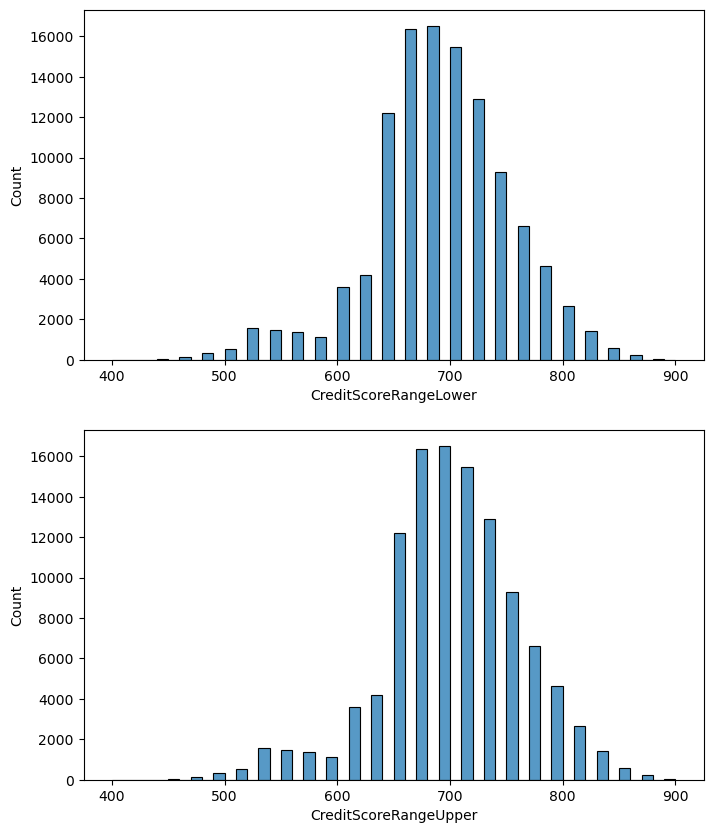

In [22]:
# Creating a figure with two subplots arranged vertically, each having the size 8x10, and obtaining the figure and axis objects.
fig, ax = plt.subplots(nrows=2, figsize=[8, 10])

# Defining the color for the histogram bars using the first color from the seaborn color palette.
color = sns.color_palette()[0]

# Specifying the size of each bin for the histograms as 10, and generating the bin edges using numpy 'arange'.
binsize = 10
bins = np.arange(400, loan['CreditScoreRangeUpper'].max() + binsize, binsize)

# Plotting a histogram of the 'CreditScoreRangeLower' column from the 'loan' dataset with specified bins and color, on the first subplot.
sns.histplot(loan['CreditScoreRangeLower'], bins=bins, color=color, ax=ax[0])

# Plotting a histogram of the 'CreditScoreRangeUpper' column from the 'loan' dataset with specified bins and color, on the second subplot.
sns.histplot(loan['CreditScoreRangeUpper'], bins=bins, color=color, ax=ax[1])


**Observations**: By analyzing the data, it is apparent that both the Credit Score Lower and Credit Score Upper display comparable distributions. This similarity suggests a strong relationship between the two variables. The close correspondence between the two sets of scores indicates that they likely represent different aspects or measurements of the same underlying creditworthiness or credit risk.

In [51]:
# Calculate the descriptive statistics of the 'CreditScoreRangeLower' column.
credit_score_lower_stats = loan['CreditScoreRangeLower'].describe()

# Calculate the descriptive statistics of the 'CreditScoreRangeUpper' column.
credit_score_upper_stats = loan['CreditScoreRangeUpper'].describe()

In [52]:
# Print the descriptive statistics for 'CreditScoreRangeLower' and 'CreditScoreRangeUpper'.
print("Descriptive Statistics for CreditScoreRangeLower:")
print(credit_score_lower_stats)
print("\nDescriptive Statistics for CreditScoreRangeUpper:")
print(credit_score_upper_stats)

Descriptive Statistics for CreditScoreRangeLower:
count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

Descriptive Statistics for CreditScoreRangeUpper:
count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64


In [54]:
# Calculate the range of credit scores based on the minimum and maximum values.
credit_score_range_lower_min = credit_score_lower_stats['min']
credit_score_range_lower_max = credit_score_lower_stats['max']
credit_score_range_upper_min = credit_score_upper_stats['min']
credit_score_range_upper_max = credit_score_upper_stats['max']

# Print the range of credit scores for 'CreditScoreRangeLower' and 'CreditScoreRangeUpper'.
print("\nRange of Credit Scores for CreditScoreRangeLower:")
print(f"Minimum: {credit_score_range_lower_min}, Maximum: {credit_score_range_lower_max}")
print("\nRange of Credit Scores for CreditScoreRangeUpper:")
print(f"Minimum: {credit_score_range_upper_min}, Maximum: {credit_score_range_upper_max}")



Range of Credit Scores for CreditScoreRangeLower:
Minimum: 0.0, Maximum: 880.0

Range of Credit Scores for CreditScoreRangeUpper:
Minimum: 19.0, Maximum: 899.0


In [55]:
# Calculate the number of unique credit score values for 'CreditScoreRangeLower' and 'CreditScoreRangeUpper'.
num_unique_credit_scores_lower = loan['CreditScoreRangeLower'].nunique()
num_unique_credit_scores_upper = loan['CreditScoreRangeUpper'].nunique()

# Print the number of unique credit score values for each range.
print("\nNumber of Unique Credit Scores for CreditScoreRangeLower:", num_unique_credit_scores_lower)
print("Number of Unique Credit Scores for CreditScoreRangeUpper:", num_unique_credit_scores_upper)


Number of Unique Credit Scores for CreditScoreRangeLower: 26
Number of Unique Credit Scores for CreditScoreRangeUpper: 26


**Question**: How is the distribution of loan terms in the dataset?

**Visualization**: A histogram of the 'Term' column from the 'loan' dataset.

<AxesSubplot:xlabel='Term', ylabel='Count'>

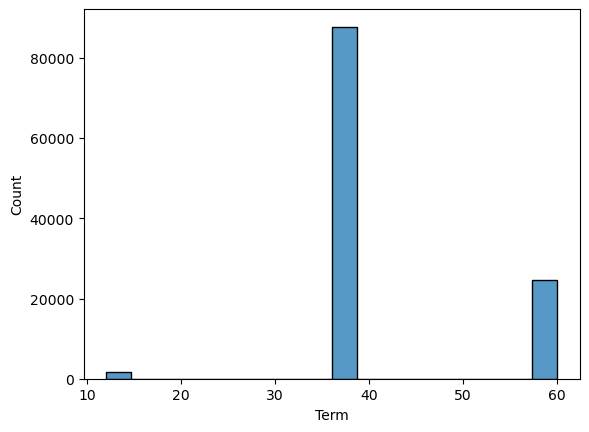

In [23]:
# Creating a histogram of the 'Term' column from the 'loan' dataset using seaborn, visualizing the frequency of each term value.
sns.histplot(data = loan, x = 'Term')

##### let's proceed with analyzing the three unique values in the term column.

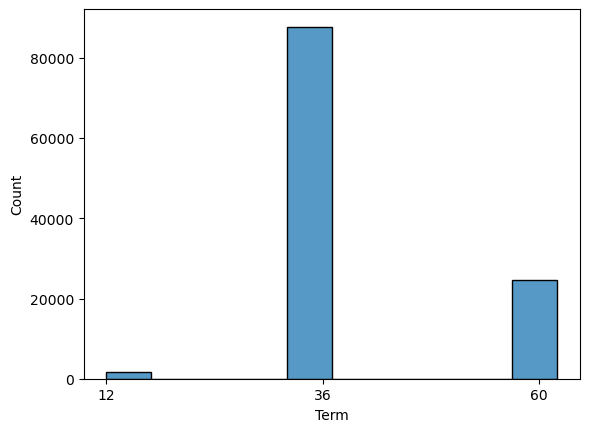

In [28]:
# Counting the occurrences of each unique value in the 'Term' column and storing the result in 'unique_term'.
unique_term = loan['Term'].value_counts()

# Extracting the unique term values as the index of the 'unique_term' Series and storing it in 'term_index'.
term_index = unique_term.index

# Sorting the unique term values in ascending order and saving the result in 'sorted_term'.
sorted_term = sorted(term_index)

# Creating custom labels for the x-axis ticks using the sorted term values.
labels = ['{}'.format(i) for i in sorted_term]

# Plotting a histogram of the 'Term' column from the 'loan' dataset with a bin width of 5 using seaborn.
sns.histplot(data=loan, x='Term', binwidth=5)

# Setting the custom labels on the x-axis ticks.
plt.xticks(sorted_term, labels)

# Displaying the plot.
plt.show()

**Observations**: we have noticed that the number of borrowers is highest for the 36-month loan term, followed by the 60-month term, while the 12-month term has the lowest number of borrowers. These findings suggest that borrowers tend to prefer longer-term loans, with the 36-month option being the most popular choice. 

In [47]:
# Calculate the total number of terms (unique values) in the 'Term' column.
num_unique_terms = len(unique_term)

In [48]:
# Print the count of each unique term and the custom labels for x-axis.
print("Count of each unique term:")
print(unique_term)
print("\nCustom labels for x-axis:")
print(labels)

Count of each unique term:
36    87778
60    24545
12     1614
Name: Term, dtype: int64

Custom labels for x-axis:
['1000', '3000', '10000', '30000']


In [49]:
# Calculate the total number of loans with each term and print it.
total_loans_per_term = loan['Term'].value_counts().sum()
print("\nTotal number of loans for each term:")
print(total_loans_per_term)


Total number of loans for each term:
113937


In [50]:
# Calculate the percentage of loans for each term and print it.
percentage_loans_per_term = (unique_term / total_loans_per_term) * 100
print("\nPercentage of loans for each term:")
print(percentage_loans_per_term)


Percentage of loans for each term:
36    77.040821
60    21.542607
12     1.416572
Name: Term, dtype: float64


**Question: In the Prosper loan dataset, what information does the "Loan amount" feature provide for each individual loan, and how can analyzing this data help in gaining insights into the lending patterns and borrower preferences on the platform?**

##### Let's take a look at the Loan amount.

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='Count'>

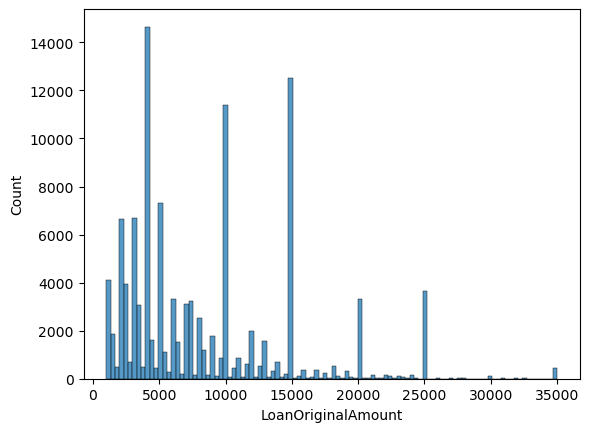

In [30]:
# Plotting a histogram of 'LoanOriginalAmount' from the 'loan' dataset using seaborn.
sns.histplot(data = loan, x = 'LoanOriginalAmount')

"It is right-skewed."

In [34]:
# Calculating the logarithm (base 10) of the descriptive statistics of the 'LoanOriginalAmount' column in the 'loan' dataset.
np.log10(loan['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

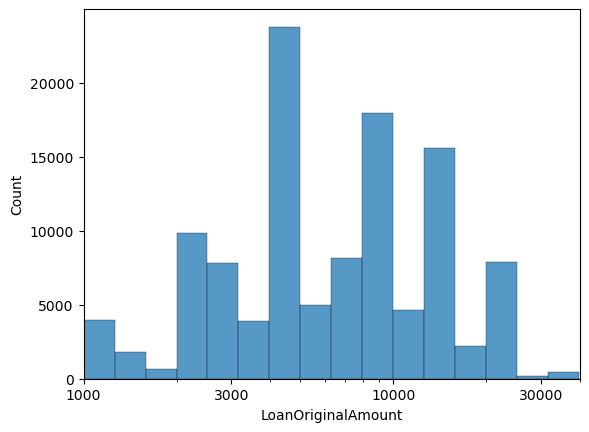

In [44]:
# Generating an array of numbers in the range [1000, 10^4.6] with a step size of 0.1 using numpy
bins = 10 ** np.arange(3.0 , 4.6+0.1, 0.1)

# Creating a histogram using seaborn to visualize the 'LoanOriginalAmount' data from the 'loan' dataset
sns.histplot(data = loan, x = 'LoanOriginalAmount', bins = bins);

# Defining custom ticks and labels for the x-axis (loan amounts)
ticks = [1000, 3000, 10000, 30000]
labels = ['{}'.format(i) for i in ticks ]

# Setting the x-axis scale to logarithmic for better visualization of data distribution
plt.xscale('log')

# Assigning the custom ticks and labels to the x-axis
plt.xticks(ticks, labels)

# Setting the x-axis limits to focus the plot between 1000 and 40000
plt.xlim((1000, 40000))

# Displaying the plot
plt.show()

In [46]:
# The 'LoanOriginalAmount' column from the 'loan' dataset will be used to create a histogram.
loan_original_amount = loan['LoanOriginalAmount']

# Calculating the number of unique loan amounts.
num_unique_loan_amounts = len(loan_original_amount.unique())

# Printing the number of unique loan amounts.
print(f"Number of unique loan amounts: {num_unique_loan_amounts}")

Number of unique loan amounts: 2468


**Question 1: In the Prosper loan dataset, how many borrowers are homeowners?**

**Question 2: In the Prosper loan dataset, how many borrowers are part of a group?**

**Question 3: In the Prosper loan dataset, how many borrowers have indicated that they possess the required documentation to support their income?**

##### Let's compare  each of the following counts:
1. The number of borrowers who are homeowners.


2. The number of borrowers who are part of a group.


3.     The number of borrowers who have indicated that they possess the required documentation to support their income.



<AxesSubplot:xlabel='IncomeVerifiable', ylabel='count'>

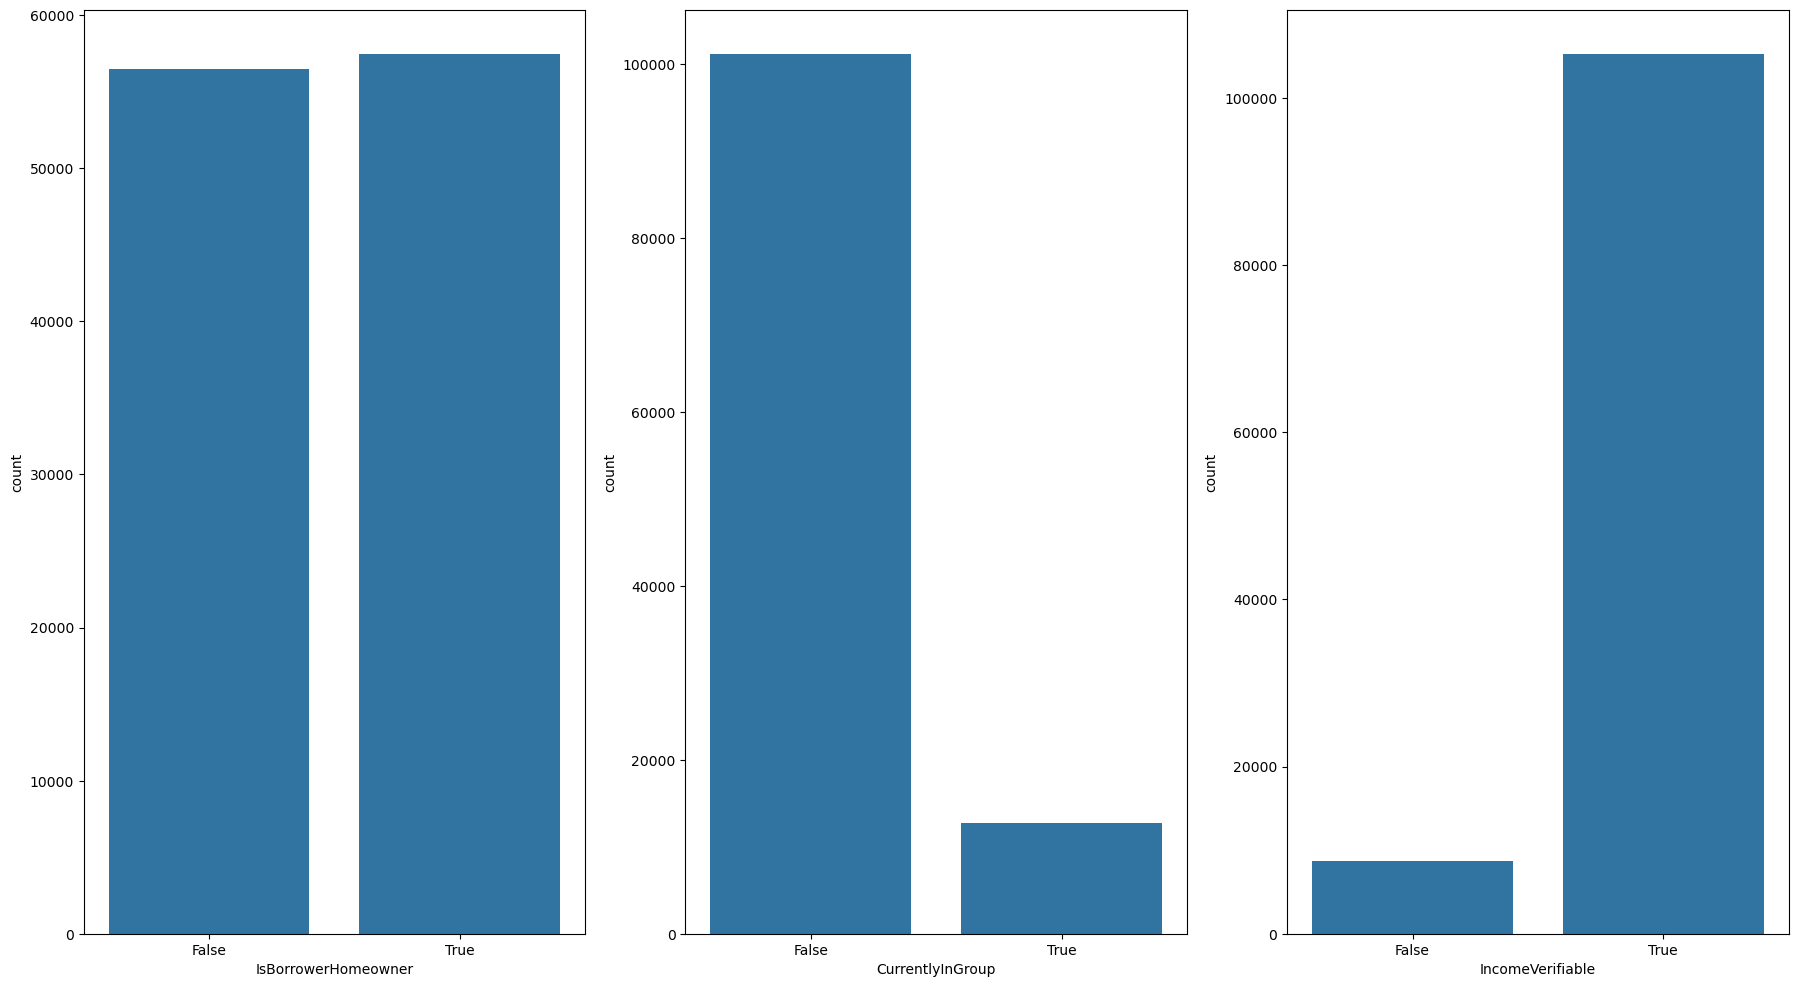

In [58]:
# Creating a new figure with a size of 22x12 to accommodate three subplots side by side.
plt.figure(figsize=[22, 12])

# Defining the color for the count bars using the first color from seaborn color palette.
color = sns.color_palette()[0]

# Subplot 1: Countplot showing the distribution of 'IsBorrowerHomeowner' column in 'loan' dataset.
plt.subplot(1, 3, 1)
sns.countplot(data=loan, x='IsBorrowerHomeowner', color=color)

# Subplot 2: Countplot showing the distribution of 'CurrentlyInGroup' column in 'loan' dataset.
plt.subplot(1, 3, 2)
sns.countplot(data=loan, x='CurrentlyInGroup', color=color)

# Subplot 3: Countplot showing the distribution of 'IncomeVerifiable' column in 'loan' dataset.
plt.subplot(1, 3, 3)
sns.countplot(data=loan, x='IncomeVerifiable', color=color)

# Displaying the plot with the three subplots.
plt.show()

In [59]:
# Counting the occurrences of each unique value in the 'IsBorrowerHomeowner' column.
is_borrower_homeowner_counts = loan['IsBorrowerHomeowner'].value_counts()

# Counting the occurrences of each unique value in the 'CurrentlyInGroup' column.
currently_in_group_counts = loan['CurrentlyInGroup'].value_counts()

# Counting the occurrences of each unique value in the 'IncomeVerifiable' column.
income_verifiable_counts = loan['IncomeVerifiable'].value_counts()

# Printing the count of borrowers who are homeowners and those who are not.
print("Count of IsBorrowerHomeowner:")
print(is_borrower_homeowner_counts)

# Printing the count of borrowers who are currently in a group and those who are not.
print("\nCount of CurrentlyInGroup:")
print(currently_in_group_counts)

# Printing the count of borrowers with verifiable and non-verifiable incomes.
print("\nCount of IncomeVerifiable:")
print(income_verifiable_counts)

Count of IsBorrowerHomeowner:
True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

Count of CurrentlyInGroup:
False    101218
True      12719
Name: CurrentlyInGroup, dtype: int64

Count of IncomeVerifiable:
True     105268
False      8669
Name: IncomeVerifiable, dtype: int64


#### What is the loan status for each borrower in the dataset?

##### Let's examine the loan status for each borrower in the dataset.

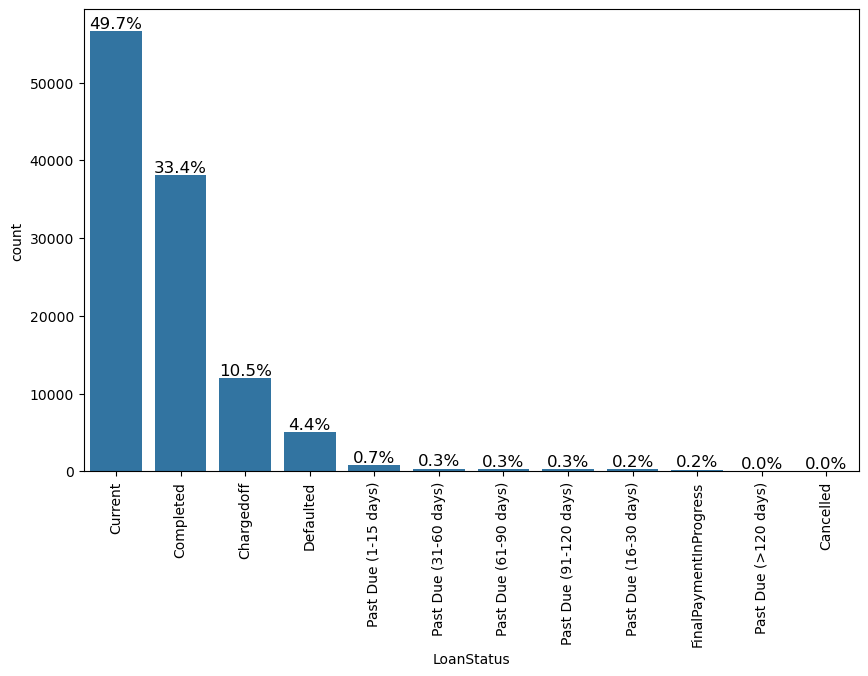

In [66]:
# Calculating the frequency of each unique value in the 'LoanStatus' column and storing it in 'frequence'.
frequence = loan['LoanStatus'].value_counts()

# Extracting the unique values of 'LoanStatus' as the index of the 'frequence' Series and storing it in 'freq_index'.
freq_index = frequence.index

# Calculating the sum of all the counts in the 'LoanStatus' column and storing it in 'sum_of_count'.
sum_of_count = loan['LoanStatus'].value_counts().sum()

# Adjust the figure size for better visibility
plt.figure(figsize=(10, 6))  

# Defining the color for the count bars using the first color from the seaborn color palette.
color = sns.color_palette()[0]

# Creating a countplot of the 'LoanStatus' column in 'loan' dataset with a custom order specified by 'freq_index', and assigning the plot to 'ax'.
ax = sns.countplot(data=loan, x='LoanStatus', color=color, order=freq_index)

# Setting the rotation angle of the x-axis tick labels to 90 degrees using 'plt.xticks(rotation=90)'.
plt.xticks(rotation = 90)

# Adding percentage labels above each bar in the countplot.
for i in range(frequence.shape[0]):
    count = frequence[i]
    percent_string = '{:0.1f}%'.format(100 * count / sum_of_count)
    
    # Adding the percentage label above each bar with specified properties for text alignment and formatting.
    ax.text(i, count + 1, percent_string, ha='center', va='bottom', fontsize=12, color='black')

In [65]:
# Calculating the frequency of each unique value in the 'LoanStatus' column and storing it in 'frequence'.
frequence = loan['LoanStatus'].value_counts()

# Extracting the unique values of 'LoanStatus' as the index of the 'frequence' Series and storing it in 'freq_index'.
freq_index = frequence.index

# Calculating the sum of all the counts in the 'LoanStatus' column and storing it in 'sum_of_count'.
sum_of_count = loan['LoanStatus'].value_counts().sum()

# Printing the frequency counts of each unique loan status.
print("Frequency of each unique LoanStatus:")
print(frequence)

# Printing the total count of loan statuses.
print("\nTotal count of loan statuses:", sum_of_count)

# Calculating and printing the percentage of each loan status in the dataset.
print("\nPercentage of each LoanStatus:")
for i in range(frequence.shape[0]):
    count = frequence[i]
    percent_string = '{:0.1f}%'.format(100 * count / sum_of_count)
    print(f"{freq_index[i]}: {percent_string}")

Frequency of each unique LoanStatus:
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

Total count of loan statuses: 113937

Percentage of each LoanStatus:
Current: 49.7%
Completed: 33.4%
Chargedoff: 10.5%
Defaulted: 4.4%
Past Due (1-15 days): 0.7%
Past Due (31-60 days): 0.3%
Past Due (61-90 days): 0.3%
Past Due (91-120 days): 0.3%
Past Due (16-30 days): 0.2%
FinalPaymentInProgress: 0.2%
Past Due (>120 days): 0.0%
Cancelled: 0.0%


#### What is the employment status for each borrower in the dataset?

##### Let's examine the employment status for each borrower in the dataset.

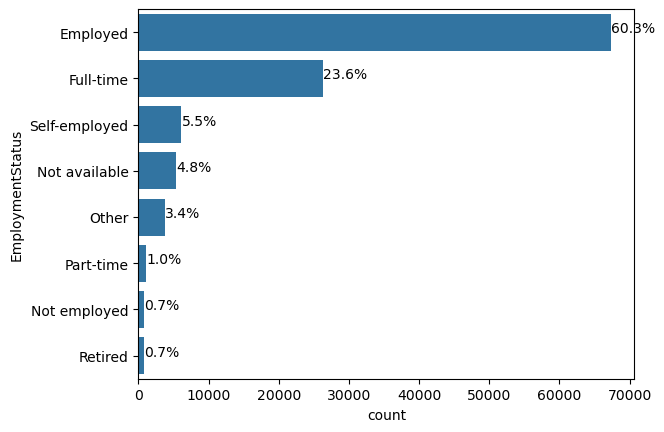

In [91]:
# Calculate the frequency of each unique value in the 'EmploymentStatus' column of the 'loan' DataFrame.
frequence = loan['EmploymentStatus'].value_counts()

# Get the index of the 'frequence' Series, which represents the unique values in the 'EmploymentStatus' column.
freq_index = frequence.index

# Calculate the total count of all employment statuses in the 'EmploymentStatus' column.
sum_of_count = loan['EmploymentStatus'].value_counts().sum()

# Get a color from the seaborn default color palette for plotting.
color = sns.color_palette()[0]

# Create a count plot using seaborn to visualize the distribution of 'EmploymentStatus' values on the y-axis.
# The bars will be colored using the 'color' defined earlier, and the order of bars will be based on the 'freq_index'.
ax = sns.countplot(data=loan, y='EmploymentStatus', color=color, order=freq_index)

# Iterate through each unique employment status count to add text annotations on the plot.
for i in range(frequence.shape[0]):
    # Get the count of the current employment status.
    count = frequence[i]
    
    # Calculate the percentage of the current employment status count relative to the total count.
    percent_string = '{:0.1f}%'.format(100 * count / sum_of_count)
    
    # Add the percentage annotation text on the plot at the specified position (count, i) with left alignment.
    ax.text(count, i, percent_string, ha='left')

In [92]:
# First, calculate the frequency of each unique value in the 'EmploymentStatus' column.
frequency = loan['EmploymentStatus'].value_counts()

# Calculate the total count of all employment statuses in the 'EmploymentStatus' column.
sum_of_count = frequency.sum()

# Calculate the percentage of each employment status relative to the total count.
percentages = (frequency / sum_of_count) * 100

# Create a DataFrame to store the results.
employment_status_analysis = pd.DataFrame({
    'EmploymentStatus': frequency.index,
    'Count': frequency.values,
    'Percentage': percentages.values
})

# Sort the DataFrame based on the employment status count in descending order.
employment_status_analysis = employment_status_analysis.sort_values(by='Count', ascending=False)

# Display the analysis results.
print(employment_status_analysis)

  EmploymentStatus  Count  Percentage
0         Employed  67322   60.280081
1        Full-time  26355   23.598252
2    Self-employed   6134    5.492380
3    Not available   5347    4.787701
4            Other   3806    3.407890
5        Part-time   1088    0.974195
6     Not employed    835    0.747659
7          Retired    795    0.711843


## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [99]:
numeric_vars = ['Term', 'LoanOriginalAmount', 'LoanNumber', 'Investors','StatedMonthlyIncome','AvailableBankcardCredit']

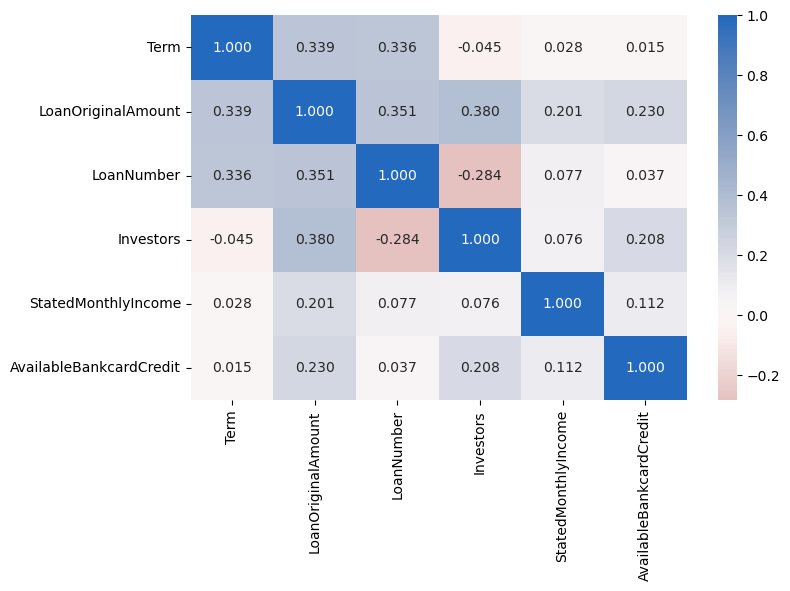

In [100]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(loan[numric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [101]:
# Calculate the correlation matrix between numeric variables
correlation_matrix = loan[numeric_vars].corr()

# Display the correlation matrix
print(correlation_matrix)

                             Term  LoanOriginalAmount  LoanNumber  Investors  \
Term                     1.000000            0.338927    0.335610  -0.045137   
LoanOriginalAmount       0.338927            1.000000    0.350870   0.380093   
LoanNumber               0.335610            0.350870    1.000000  -0.283963   
Investors               -0.045137            0.380093   -0.283963   1.000000   
StatedMonthlyIncome      0.028479            0.201259    0.077259   0.076244   
AvailableBankcardCredit  0.015348            0.229866    0.037214   0.207695   

                         StatedMonthlyIncome  AvailableBankcardCredit  
Term                                0.028479                 0.015348  
LoanOriginalAmount                  0.201259                 0.229866  
LoanNumber                          0.077259                 0.037214  
Investors                           0.076244                 0.207695  
StatedMonthlyIncome                 1.000000                 0.111869  
Availab

In [102]:
#Calculate basic descriptive statistics for numeric variables
descriptive_stats = loan[numeric_vars].describe()

# Display the descriptive statistics
print(descriptive_stats)

                Term  LoanOriginalAmount     LoanNumber      Investors  \
count  113937.000000        113937.00000  113937.000000  113937.000000   
mean       40.830248          8337.01385   69444.474271      80.475228   
std        10.436212          6245.80058   38930.479610     103.239020   
min        12.000000          1000.00000       1.000000       1.000000   
25%        36.000000          4000.00000   37332.000000       2.000000   
50%        36.000000          6500.00000   68599.000000      44.000000   
75%        36.000000         12000.00000  101901.000000     115.000000   
max        60.000000         35000.00000  136486.000000    1189.000000   

       StatedMonthlyIncome  AvailableBankcardCredit  
count         1.139370e+05            106393.000000  
mean          5.608026e+03             11210.225447  
std           7.478497e+03             19818.361309  
min           0.000000e+00                 0.000000  
25%           3.200333e+03               880.000000  
50%      

In [103]:
# Group by loan status and calculate the mean of numeric variables for each loan status
loan_status_means = loan.groupby('LoanStatus')[numeric_vars].mean()

# Display the mean values for each loan status
print(loan_status_means)

                             Term  LoanOriginalAmount    LoanNumber  \
LoanStatus                                                            
Cancelled               36.000000         1700.000000   8051.000000   
Chargedoff              38.029353         6398.916694  37703.367745   
Completed               36.613962         6189.093239  39964.935835   
Current                 44.511736        10360.835018  99704.891420   
Defaulted               36.841770         6486.798525  23118.946194   
FinalPaymentInProgress  39.278049         8346.121951  84204.190244   
Past Due (1-15 days)    43.354839         8468.445409  80482.920596   
Past Due (16-30 days)   43.698113         8156.430189  80092.441509   
Past Due (31-60 days)   44.066116         8534.336088  80902.275482   
Past Due (61-90 days)   43.974441         7730.019169  78539.559105   
Past Due (91-120 days)  44.605263         8003.976974  75988.401316   
Past Due (>120 days)    46.500000         8281.250000  73111.000000   

     

In [104]:
# Group by loan term and calculate the mean of numeric variables for each term
loan_term_means = loan.groupby('Term')[numeric_vars].mean()

# Display the mean values for each loan term
print(loan_term_means)

      Term  LoanOriginalAmount    LoanNumber  Investors  StatedMonthlyIncome  \
Term                                                                           
12    12.0         4694.296778  66193.889095  65.087980          6888.131351   
36    36.0         7276.155096  62189.536296  83.671227          5440.737639   
60    60.0        12370.397637  95603.381992  70.057486          6122.106199   

      AvailableBankcardCredit  
Term                           
12               17715.899628  
36               10768.373433  
60               12226.782644  


##### Plot matrix

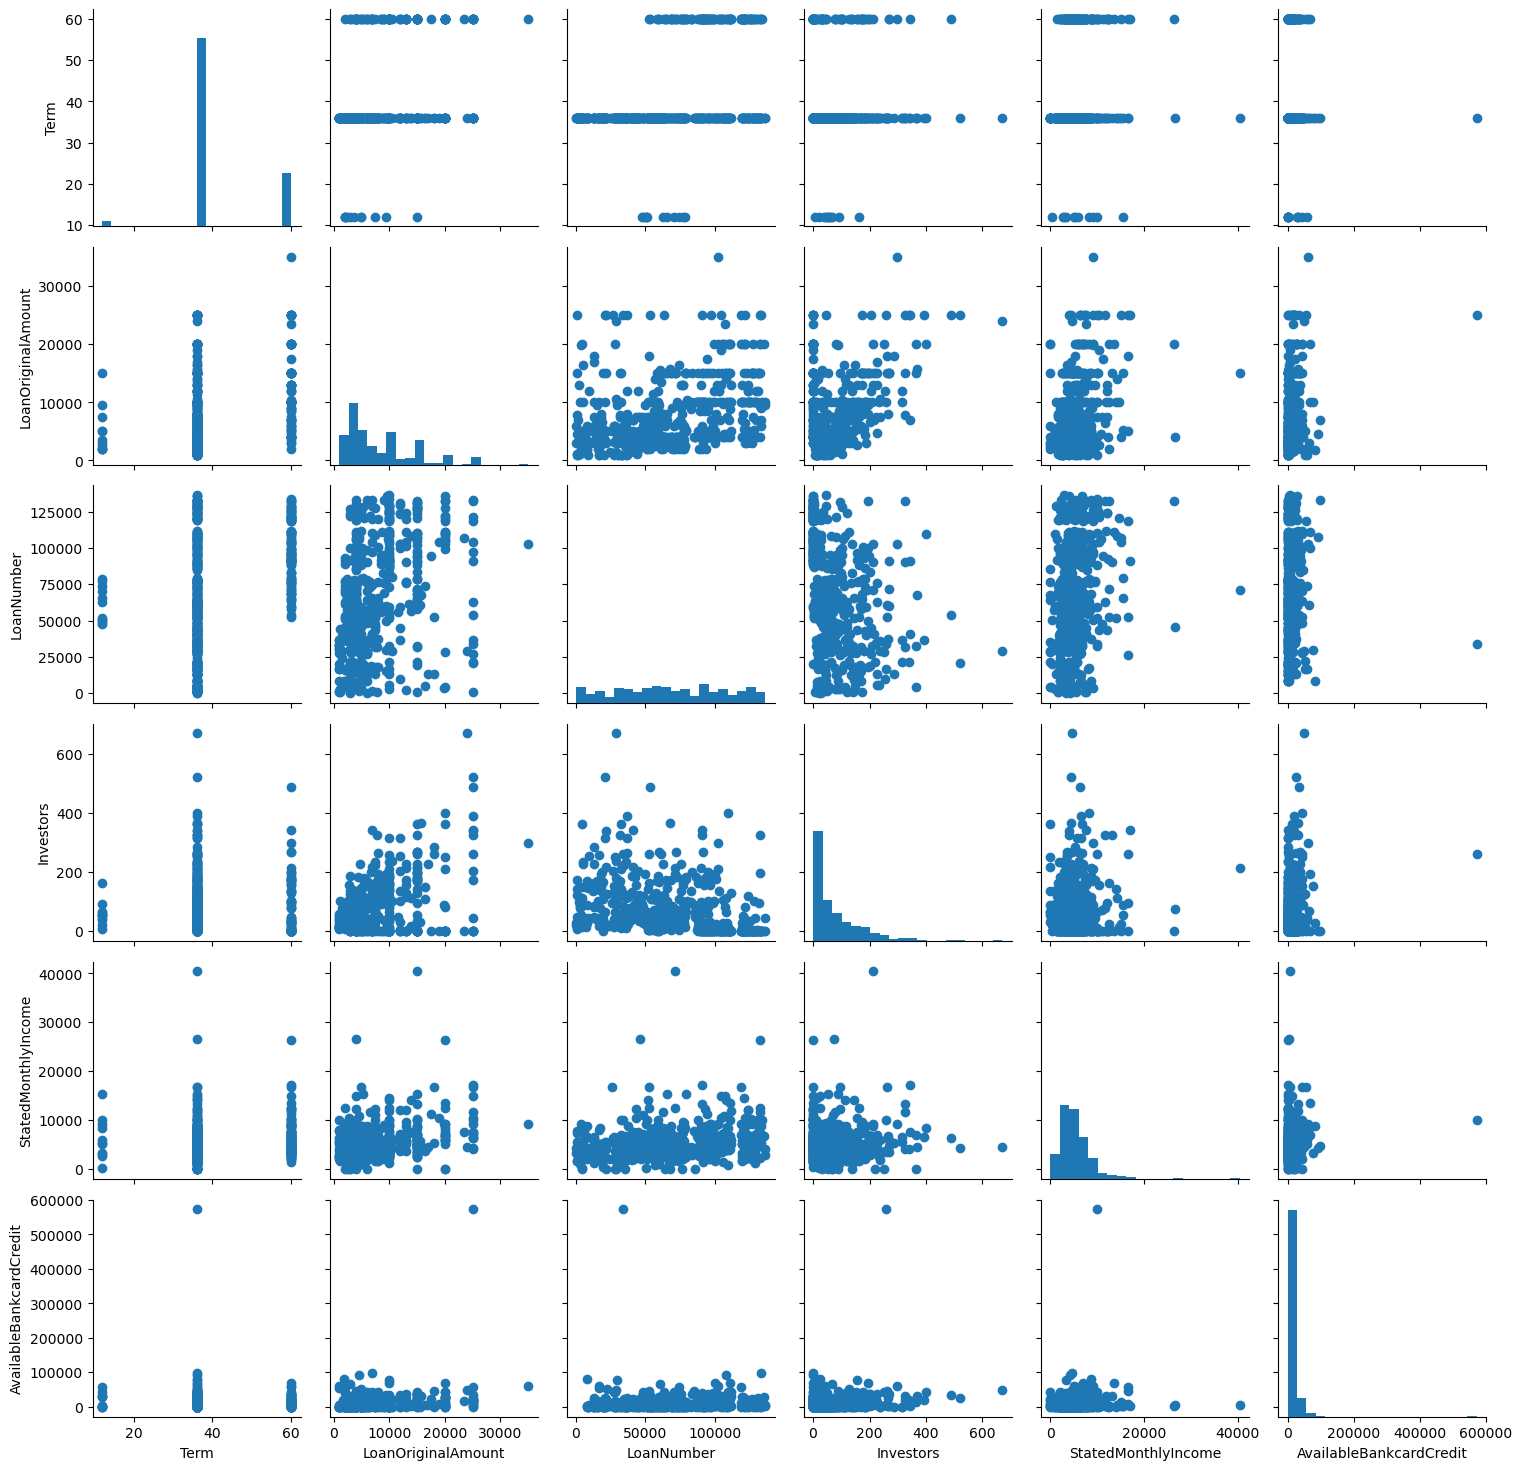

In [106]:
# Select a random sample from the 'loan' dataset without replacement.
samples = np.random.choice(loan.shape[0], 500, replace=False)

# Create a new DataFrame 'loan_sample' containing the randomly selected 500 rows from the 'loan' dataset.
loan_sample = loan.loc[samples, :]

# Create a PairGrid object 'g' using Seaborn to visualize pairwise relationships between numeric variables in 'loan_sample'.
g = sns.PairGrid(data=loan_sample, vars=numeric_vars)

# For the diagonal plots of 'g', create histograms for each numeric variable with 20 bins.
g = g.map_diag(plt.hist, bins=20)

# For the off-diagonal plots of 'g', create scatter plots to visualize the relationships between different pairs of numeric variables.
g.map_offdiag(plt.scatter)


Let's see the relation between LoanNumber & Term

Text(0, 0.5, 'Loan number in Dollar')

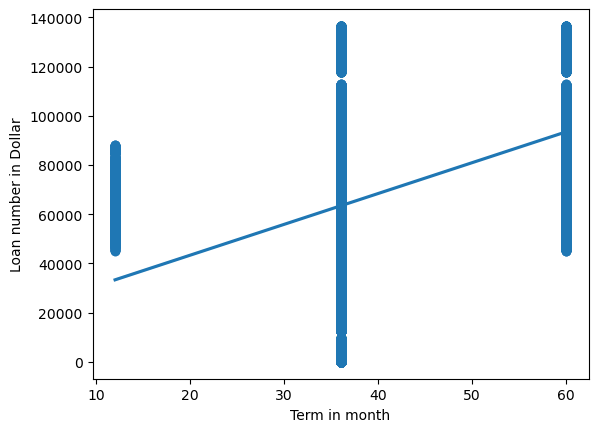

In [112]:
sns.regplot(data = loan, x = 'Term', y = 'LoanNumber')
plt.xlabel('Term in month')
plt.ylabel('Loan number in Dollar')

we have to add Jitter to move each point for better exploring

Text(0, 0.5, 'Loan number in Dollar')

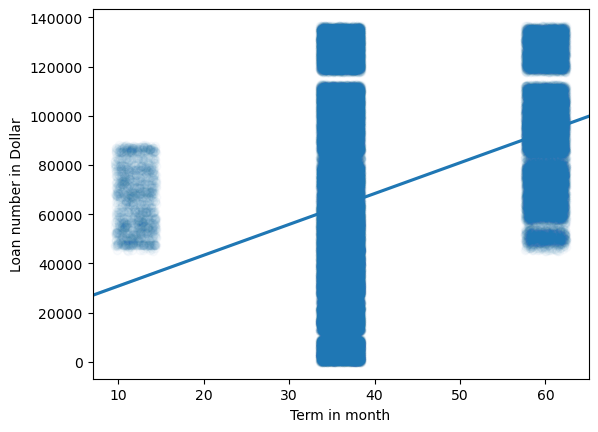

In [121]:
sns.regplot(data = loan, x = 'Term', y = 'LoanNumber',truncate = False, x_jitter = 2.4 ,scatter_kws={'alpha':1/40} )
plt.xlabel('Term in month')
plt.ylabel('Loan number in Dollar')

##### Let's add Heatmap for better visualizing

In [135]:
loan['Term'].describe()

count    113937.000000
mean         40.830248
std          10.436212
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

In [136]:
loan['LoanNumber'].describe()

count    113937.000000
mean      69444.474271
std       38930.479610
min           1.000000
25%       37332.000000
50%       68599.000000
75%      101901.000000
max      136486.000000
Name: LoanNumber, dtype: float64

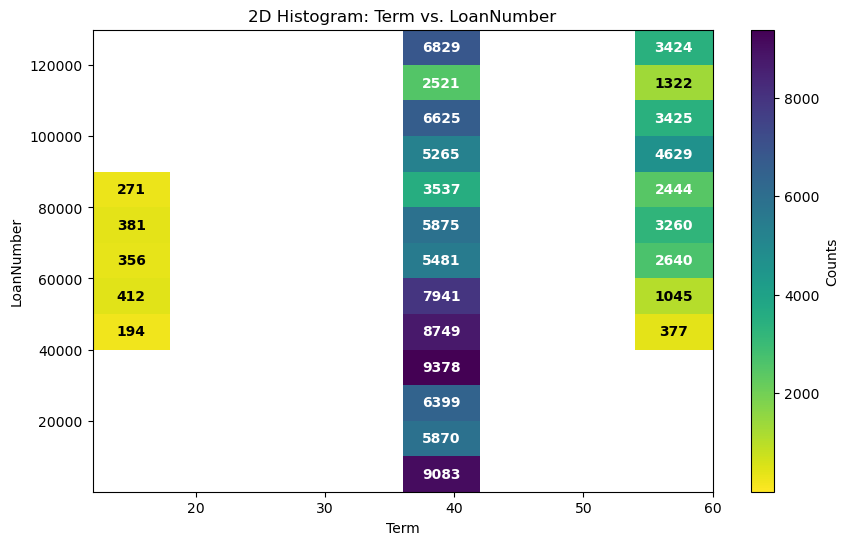

In [151]:
# Sample data
term_data = loan['Term']
loan_number_data = loan['LoanNumber']

# Specify bin edges for Term & LoanNumber
term_bins = np.arange(12, 61, 6)  # Bin edges for Term from 12 to 60 with a step of 6
loan_number_bins = np.arange(1, 136487, 10000)  # Bin edges for LoanNumber from 1 to 136486 with a step of 10000

# Set up the plot with a white background
plt.figure(figsize=(10, 6), facecolor='white')
plt.imshow(hist.T, cmap='viridis_r', origin='lower', aspect='auto', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], interpolation='nearest', vmin=0.1)

# Add text annotation on each cell
for i in range(len(term_bins) - 1):
    for j in range(len(loan_number_bins) - 1):
        count = hist[i, j]
        if count >= 2000:  # Only add annotations for counts greater than or equal to 2000
            plt.text(term_bins[i] + 3, loan_number_bins[j] + 5000, int(count), ha='center', va='center', color='white', fontweight='bold')
        elif count > 0:
            plt.text(term_bins[i] + 3, loan_number_bins[j] + 5000, int(count), ha='center', va='center', color='black', fontweight='bold')

# Add labels and title
plt.xlabel('Term')
plt.ylabel('LoanNumber')
plt.title('2D Histogram: Term vs. LoanNumber')

# Add color bar
cbar = plt.colorbar()
cbar.set_label('Counts')

# Show the plot
plt.show()

In [179]:

# Get the indices of the bin with the highest count
max_bin_idx = np.unravel_index(hist.argmax(), hist.shape)
max_count = int(hist[max_bin_idx])

# Calculate statistics
total_counts = np.sum(hist)
mean_count = np.mean(hist)

# Print the analysis results
print("Analysis for 2D Histogram:")
print(f"Total counts: {total_counts}")
print(f"Mean count: {mean_count}")
print(f"Max count: {max_count} ")

Analysis for 2D Histogram:
Total counts: 107733.0
Mean count: 1035.8942307692307
Max count: 9378 


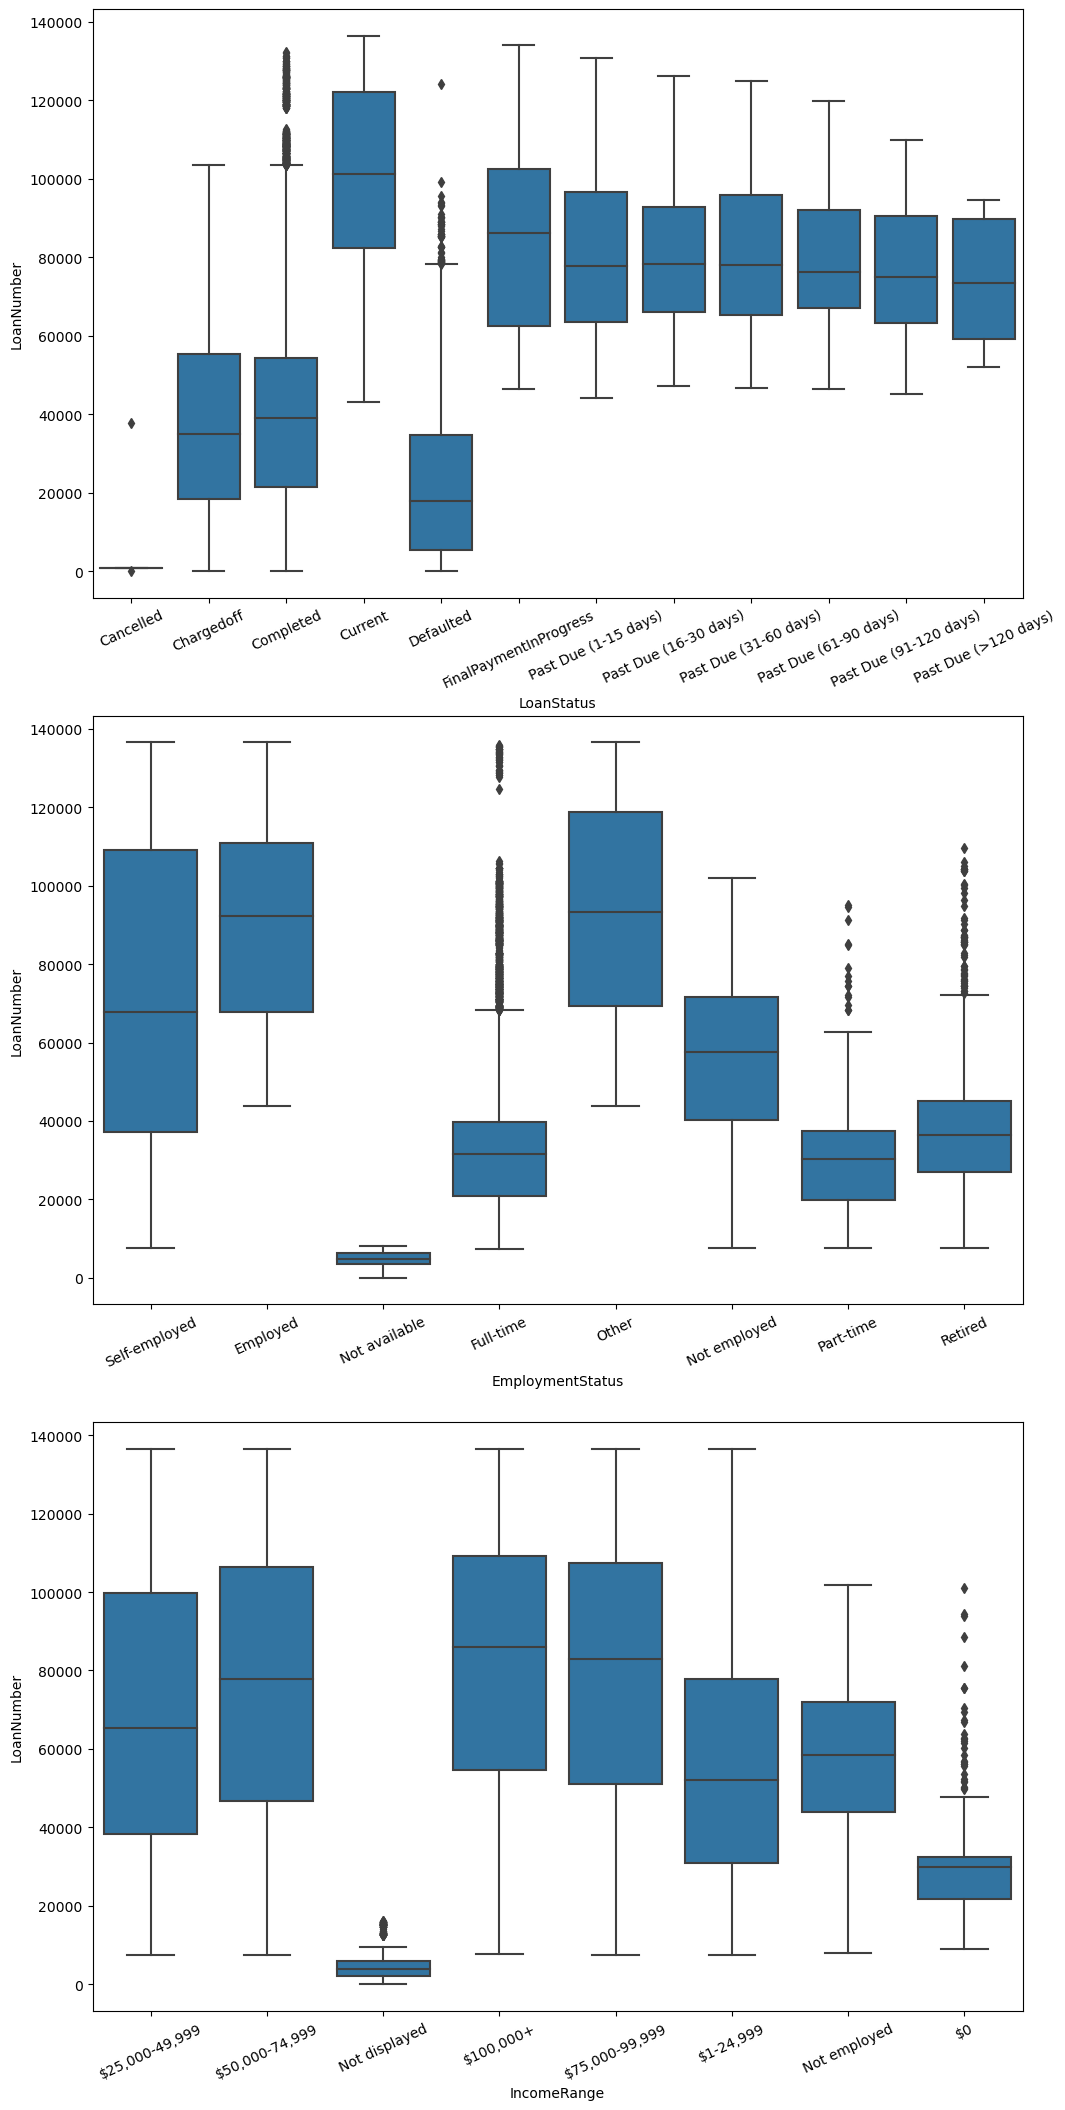

In [167]:
# Create a new figure with a size of 12 inches (width) by 26 inches (height).
plt.figure(figsize=[12, 26])

# Define the color for the plots using the default seaborn color palette.
color = sns.color_palette()[0]

# subplot 1: LoanStatus vs LoanNumber
plt.subplot(3, 1, 1)
sns.boxplot(data=loan, x='LoanStatus', y='LoanNumber', color=color)
plt.xticks(rotation=25)

# subplot 2: EmploymentStatus vs LoanNumber
plt.subplot(3, 1, 2)
sns.boxplot(data=loan, x='EmploymentStatus', y='LoanNumber', color=color)
plt.xticks(rotation=25)

# subplot 3: IncomeRange vs LoanNumber
plt.subplot(3, 1, 3)
sns.boxplot(data=loan, x='IncomeRange', y='LoanNumber', color=color)
plt.xticks(rotation=25)

In [168]:
# Analysis for 'LoanStatus'
loan_status_analysis = loan.groupby('LoanStatus')['LoanNumber'].describe()

# Analysis for 'EmploymentStatus'
employment_status_analysis = loan.groupby('EmploymentStatus')['LoanNumber'].describe()

# Analysis for 'IncomeRange'
income_range_analysis = loan.groupby('IncomeRange')['LoanNumber'].describe()

# Print the analysis results
print("Analysis for LoanStatus:")
print(loan_status_analysis)
print()

print("Analysis for EmploymentStatus:")
print(employment_status_analysis)
print()

print("Analysis for IncomeRange:")
print(income_range_analysis)

Analysis for LoanStatus:
                          count          mean           std      min  \
LoanStatus                                                             
Cancelled                   5.0   8051.000000  16636.670115    125.0   
Chargedoff              11992.0  37703.367745  22728.685722     59.0   
Completed               38074.0  39964.935835  24626.523232      1.0   
Current                 56576.0  99704.891420  23951.055589  43212.0   
Defaulted                5018.0  23118.946194  20371.684124     29.0   
FinalPaymentInProgress    205.0  84204.190244  24760.344438  46518.0   
Past Due (1-15 days)      806.0  80482.920596  19971.153302  44089.0   
Past Due (16-30 days)     265.0  80092.441509  18544.861816  47070.0   
Past Due (31-60 days)     363.0  80902.275482  18915.058377  46797.0   
Past Due (61-90 days)     313.0  78539.559105  16764.053413  46380.0   
Past Due (91-120 days)    304.0  75988.401316  15844.283883  45234.0   
Past Due (>120 days)       16.0  73111.

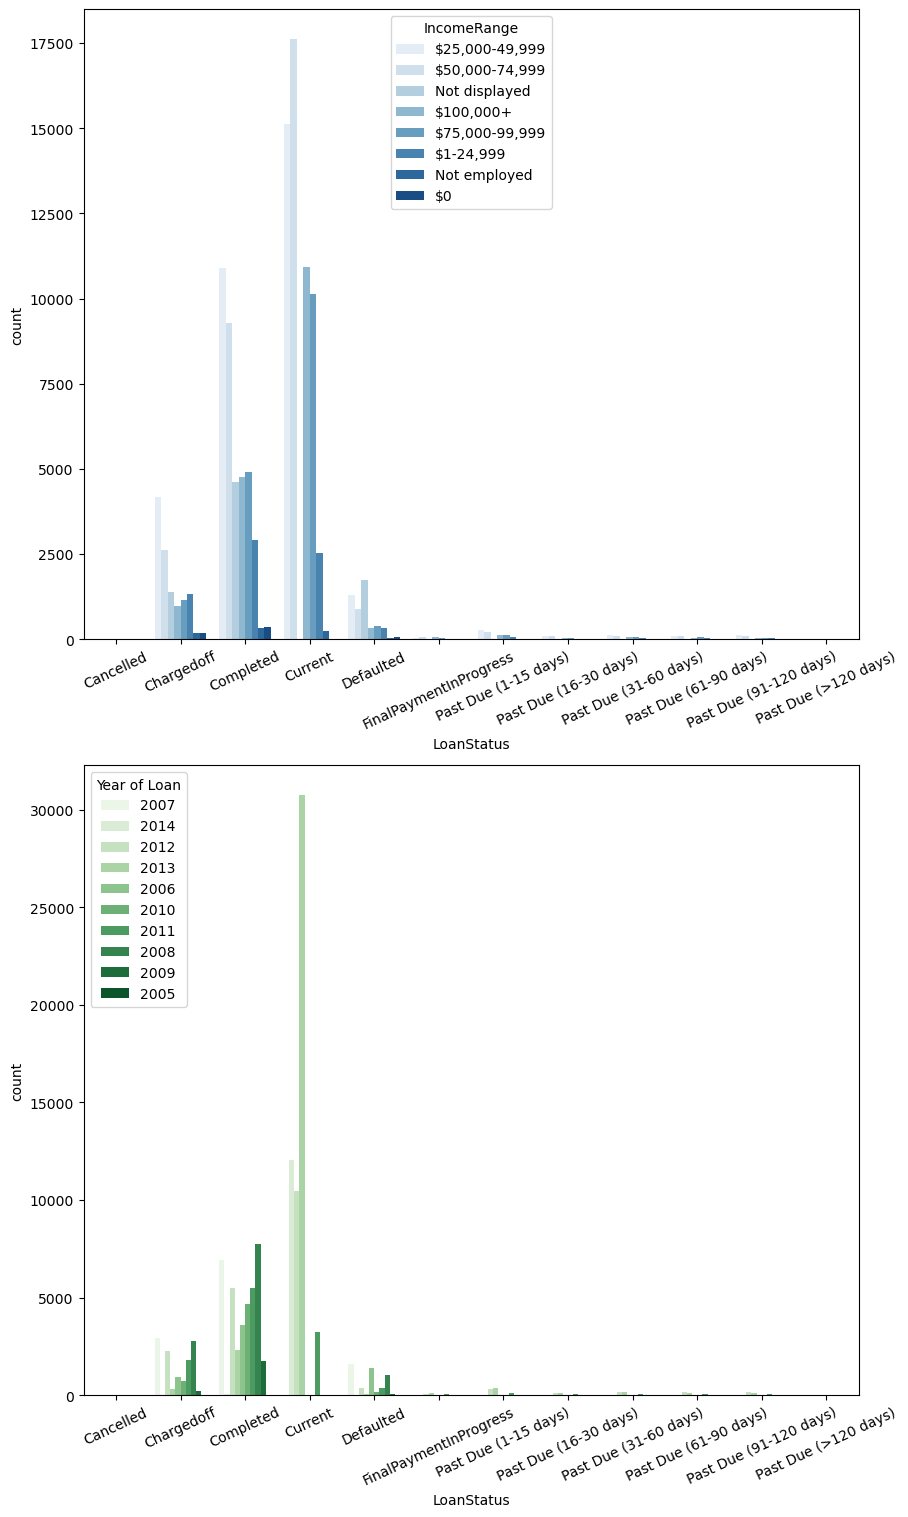

In [185]:
plt.figure(figsize = [10, 18])

# subplot 1: LoanStatus vs IncomeRange
plt.subplot(2, 1, 1)
sns.countplot(data = loan, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation=25);

# subplot 2: clarity vs. cut
ax = plt.subplot(2, 1, 2)
sns.countplot(data = loan, x = 'LoanStatus', hue = 'Year of Loan', palette = 'Greens')
plt.xticks(rotation=25);


In [187]:
# Filter the 'LoanStatus' column
allowed_statuses = ['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted']
loan = loan[loan['LoanStatus'].isin(allowed_statuses)]

# Sort 'IncomeRange' and 'Year of Loan'
income_order = ['Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                '$75,000-99,999', '$100,000+']

loan['IncomeRange'] = pd.Categorical(loan['IncomeRange'], categories=income_order, ordered=True)

year_order = sorted(loan['Year of Loan'].unique())

loan['Year of Loan'] = pd.Categorical(loan['Year of Loan'], categories=year_order, ordered=True)


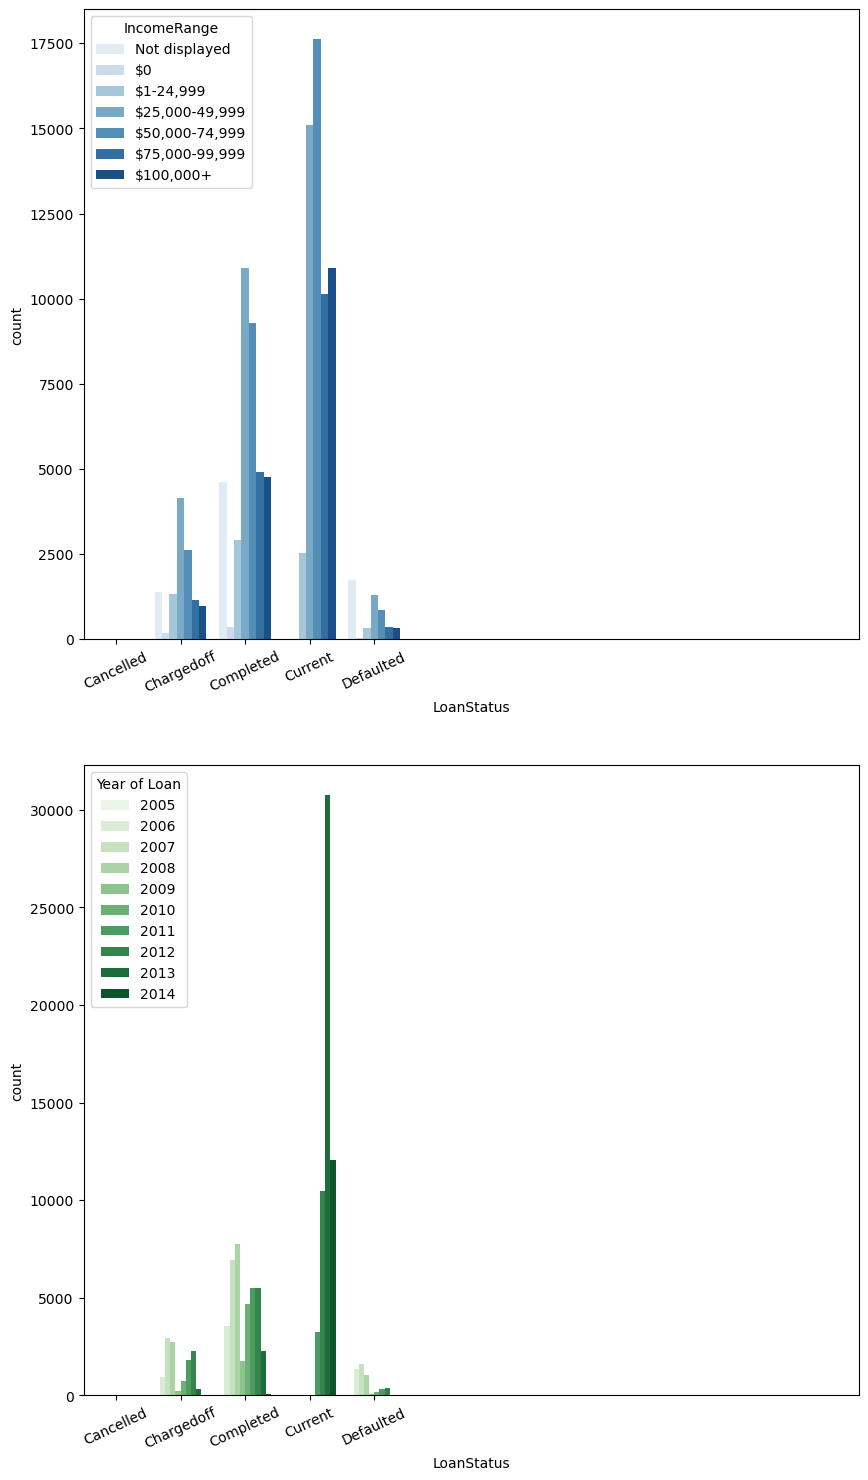

In [201]:

# Plotting the subplots
plt.figure(figsize=[10, 18])

# subplot 1: LoanStatus vs IncomeRange
plt.subplot(2, 1, 1)
sns.countplot(data=loan, x='LoanStatus', hue='IncomeRange', palette='Blues')

# Set x-axis tick labels for subplot 1
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted'], rotation=25)

# subplot 2: LoanStatus vs. Year of Loan
ax = plt.subplot(2, 1, 2)
sns.countplot(data=loan, x='LoanStatus', hue='Year of Loan', palette='Greens')

#Set x-axis tick labels for subplot 2
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted'], rotation=25)

plt.show()

## Multivariate Exploration

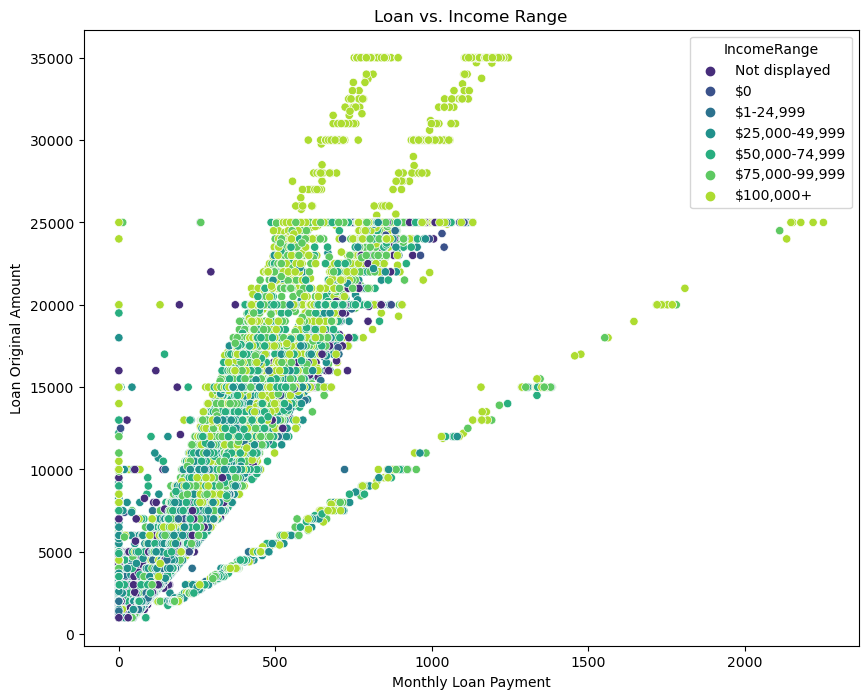

In [222]:
# Plotting the scatter plot
plt.figure(figsize=[10, 8])

# Create the scatter plot
sns.scatterplot(data=loan, x='MonthlyLoanPayment', y='LoanOriginalAmount', hue='IncomeRange', palette='viridis')

# Set axis labels and title
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Loan Original Amount')
plt.title('Loan vs. Income Range')

plt.show()

In [223]:
# Calculate the correlation between 'MonthlyLoanPayment' and 'LoanOriginalAmount'
correlation = loan['MonthlyLoanPayment'].corr(loan['LoanOriginalAmount'])
print("Correlation between Monthly Loan Payment and Loan Original Amount:", correlation)

# Calculate the average loan amount for each income range
average_loan_amount = loan.groupby('IncomeRange')['LoanOriginalAmount'].mean()
print("Average Loan Amount for each Income Range:")
print(average_loan_amount)

# Calculate the median monthly loan payment for each income range
median_monthly_payment = loan.groupby('IncomeRange')['MonthlyLoanPayment'].median()
print("Median Monthly Loan Payment for each Income Range:")
print(median_monthly_payment)

# Calculate the number of loans in each income range
loan_count_by_income_range = loan['IncomeRange'].value_counts()
print("Number of Loans in each Income Range:")
print(loan_count_by_income_range)

# Calculate summary statistics for 'MonthlyLoanPayment' and 'LoanOriginalAmount'
summary_statistics = loan[['MonthlyLoanPayment', 'LoanOriginalAmount']].describe()
print("Summary Statistics for Monthly Loan Payment and Loan Original Amount:")
print(summary_statistics)

Correlation between Monthly Loan Payment and Loan Original Amount: 0.9324941912799617
Average Loan Amount for each Income Range:
IncomeRange
Not displayed      5169.649012
$0                 7418.457050
$1-24,999          4273.888279
$25,000-49,999     6169.427309
$50,000-74,999     8675.999934
$75,000-99,999    10375.125143
$100,000+         13103.629388
Name: LoanOriginalAmount, dtype: float64
Median Monthly Loan Payment for each Income Range:
IncomeRange
Not displayed     122.48
$0                169.68
$1-24,999         134.20
$25,000-49,999    173.71
$50,000-74,999    253.39
$75,000-99,999    301.66
$100,000+         375.98
Name: MonthlyLoanPayment, dtype: float64
Number of Loans in each Income Range:
$25,000-49,999    31455
$50,000-74,999    30404
$100,000+         16980
$75,000-99,999    16581
Not displayed      7741
$1-24,999          7107
$0                  617
Name: IncomeRange, dtype: int64
Summary Statistics for Monthly Loan Payment and Loan Original Amount:
       Monthly

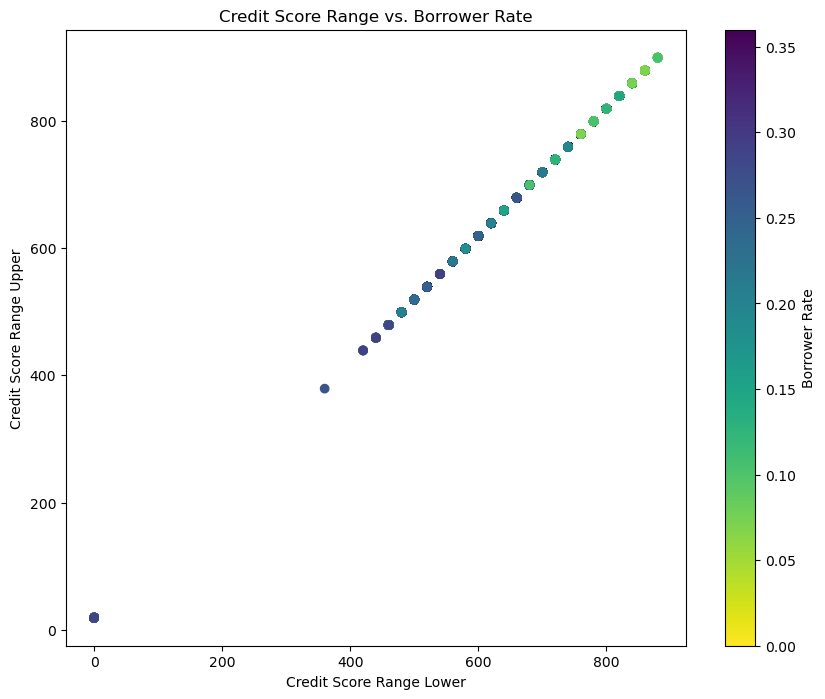

In [224]:
# Plotting the scatter plot
plt.figure(figsize=[10, 8])

# Create the scatter plot
scatter_plot = plt.scatter(data=loan, x='CreditScoreRangeLower', y='CreditScoreRangeUpper', c='BorrowerRate', cmap='viridis_r')

# Add colorbar
cbar = plt.colorbar(scatter_plot)
cbar.set_label('Borrower Rate', rotation=90)

# Set axis labels and title
plt.xlabel('Credit Score Range Lower')
plt.ylabel('Credit Score Range Upper')
plt.title('Credit Score Range vs. Borrower Rate')

plt.show()

In [225]:
# Calculate the average borrower rate
average_borrower_rate = loan['BorrowerRate'].mean()

print("Average Borrower Rate: {:.2f}%".format(average_borrower_rate * 100))

Average Borrower Rate: 19.20%


## Conclusion

The Prosper loan dataset is a vast collection of detailed information about 113,937 individual loans facilitated by Prosper. It covers a wide range of aspects related to the lending process, borrower characteristics, and loan performance metrics. This dataset offers invaluable insights into peer-to-peer lending activities, borrower profiles, and loan performance, making it a rich resource for thorough data analysis. In this comprehensive report, we will present the key findings from the data exploration and analysis, encompassing data wrangling, data storage, and data visualization.

#### Data Wrangling:
The data wrangling process involved three main steps: data gathering, data assessment, and data cleaning. The dataset consists of 113,937 rows and 81 columns, with each row representing an individual loan. To streamline the analysis and enhance efficiency, we removed unnecessary variables. Additionally, certain columns were converted to appropriate data types. For instance, we transformed LoanStatus and Quarter of Loan into categorical variables and converted Creation Date into a datetime format for easier handling and analysis.

Furthermore, we tidied the data by splitting the ListingCreationDate into Creation Date and Creation Time and the LoanOriginationQuarter into Quarter of Loan and Year of Loan. These modifications helped capture date and time components more effectively and provided better insights into loan origination periods.

#### Data Storage:
Upon completing the data cleaning process, we stored the refined dataset in a CSV file named "prosperLoanData-clean.csv" to facilitate future analysis and modeling.

#### Data Visualization:
The data visualization phase included univariate, bivariate, and multivariate analysis to uncover relationships and patterns within the dataset.

##### Univariate Data Visualization:

   - Credit score distribution was analyzed using histograms for 'CreditScoreRangeLower' and 'CreditScoreRangeUpper', showing a majority of borrowers with scores between 660 and 720.
   - Loan terms distribution revealed that borrowers generally preferred 36-month and 60-month terms over 12-month terms.
   - The 'LoanOriginalAmount' column's histogram displayed a right-skewed distribution, with most loans falling in the range of $3,000 to $10,000.
   - We explored homeownership and group membership, indicating that around 50% of borrowers were homeowners, while approximately 11% were part of a group.
   - The majority of borrowers had verifiable income, with over 92% providing documentation for income verification.
   - The countplot for 'LoanStatus' revealed that the majority of loans were in good standing or had been successfully completed.

##### Bivariate Data Visualization:

   - Correlation analysis unveiled positive correlations between 'LoanOriginalAmount' and 'Investors', 'Term' and 'LoanOriginalAmount', and 'Term' and 'LoanNumber'.
   - Pairwise relationships were visualized with scatter plots between 'Term' and 'LoanNumber', indicating a positive relationship.
   - The 2D histogram highlighted areas of higher concentration for terms around 36 months and loan numbers between 60,000 to 100,000.
   - Boxplots demonstrated how 'LoanNumber' varied for different categories of 'LoanStatus', 'EmploymentStatus,' and 'IncomeRange'.
   - The countplot for 'LoanStatus' based on 'IncomeRange' showed that the majority of loans were from individuals with income between $25,000 and $100,000.

##### Multivariate Data Visualization:

   - We explored the relationship between 'MonthlyLoanPayment' and 'LoanOriginalAmount', finding a strong positive correlation and an upward trend in the scatter plot.
   - The scatter plot for credit score ranges and borrower rates did not show a clear pattern, suggesting other factors may influence borrower rates.
   
####  In Summary,
The Prosper loan dataset has proven to be a valuable resource for understanding the intricacies of peer-to-peer lending. The data exploration and analysis presented in this report have shed light on borrower characteristics, loan attributes, and loan performance metrics. These insights can be leveraged to enhance risk assessment, improve lending strategies, and inform decision-making processes in the financial industry.

Researchers and analysts in the financial domain can use this dataset as a robust foundation for further investigations and modeling. Predictive models could be developed to forecast loan behavior, identify potential default risks, and optimize loan terms to maximize profitability while minimizing risk.

Moreover, the findings from this dataset can provide actionable insights for the peer-to-peer lending industry to create more personalized loan products, improve borrower targeting, and enhance customer satisfaction. By understanding borrower preferences, behaviors, and risk profiles, lending platforms can better meet the needs of their customers and build trust in the lending ecosystem.

However, it is essential to acknowledge that every dataset has its limitations, and this Prosper loan dataset is no exception. Researchers should be aware of potential biases, missing data, and changes in lending practices over time. Thorough analysis and robust validation of any models or findings derived from this dataset are crucial to ensure their applicability and accuracy in real-world scenarios.

Overall, the Prosper loan dataset stands as a valuable asset, encouraging further research and exploration in the domain of peer-to-peer lending and financial analytics. The knowledge gained from this dataset can contribute to the growth and advancement of the financial sector and support evidence-based decision-making for lenders and borrowers alike.
